In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [15]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data = df.values
print(data.shape)
data

(42000, 785)


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
X = data[:,1:]
Y = data[:,0]
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [24]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split]
Y_test = Y[split:]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

33600
(33600, 784) (8400, 784)
(33600,) (8400,)


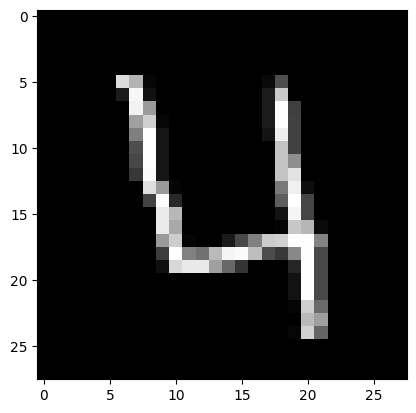

4


In [27]:
# visulaise some sample

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()
    
drawImg(X[3])
print(Y[3])

In [28]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))
                   
def knn(X, Y, queryPoint, k=5):
    
    vals = []
    n = X.shape[0]
    
    for i in range(n):
        d = dist(queryPoint, X[i])
        vals.append([d, Y[i]])
        
    vals.sort()
    
    #Nearest/first K points
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [34]:
pred = knn(X_train, Y_train, X_test[1])
print(int(pred))

7


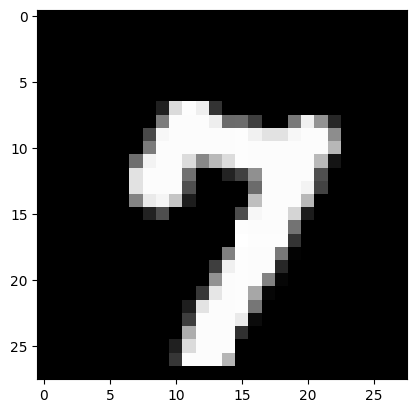

7


In [33]:
drawImg(X_test[1])
print(Y_test[1])